# Задание по sympy и scipy

## Эпизод 1

In [10]:
from scipy import linalg
from sympy import Matrix, symbols

rho, Lambda, mu = symbols('rho Lambda mu')

A = Matrix([
    [0, 0, 0, -1/rho, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, -1/rho, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, -1/rho, 0, 0, 0],
    [-(Lambda + 2 * mu), 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, -mu, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, -mu, 0, 0, 0, 0, 0],
    [-Lambda, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [-Lambda, 0, 0, 0, 0, 0, 0, 0, 0],
])
print(A.eigenvals())

{-sqrt((Lambda + 2*mu)/rho): 1, sqrt((Lambda + 2*mu)/rho): 1, 0: 7}


## Эпизод 2

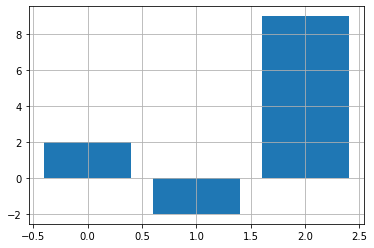

In [16]:
import numpy as np
import matplotlib.pyplot as plt

A = np.genfromtxt('small.txt', skip_header=1, skip_footer=1)
n = np.genfromtxt('small.txt', skip_footer=len(A) + 1)
b = np.genfromtxt('small.txt', skip_header=len(A) + 1)
x = linalg.solve(A, b)

fig, ax = plt.subplots()
ax.bar(np.arange(n), x)
plt.grid(True)
plt.show()

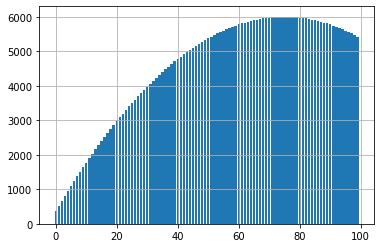

In [17]:
A = np.genfromtxt('large.txt', skip_header=1, skip_footer=1)
n = np.genfromtxt('large.txt', skip_footer=len(A) + 1)
b = np.genfromtxt('large.txt', skip_header=len(A) + 1)
x = linalg.solve(A, b)

fig, ax = plt.subplots()
ax.bar(np.arange(n), x)
plt.grid(True)
plt.show()

## Эпизод 3

Eq(y(x), 1.4142135623731*exp(-2*x))


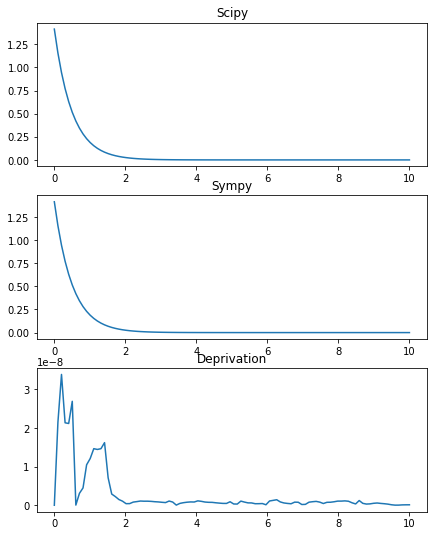

In [35]:
from sympy import Derivative, Eq, symbol
import matplotlib.pyplot as plt
from scipy.integrate import odeint


def dydx(y, x):
    return (-2 * y)


y = Function('y')
x = symbols('x')

eq = Eq(Derivative(y(x), x), -2*y(x))
eq1 = dsolve(eq, y(x), ics={y(0):2**0.5})
eq2 = lambdify(x, eq1.rhs, "numpy")
print(dsolve(eq, y(x), ics={y(0):2**0.5}))

t = np.linspace(0, 10, 100)
y1 = odeint(dydx, 2**0.5, t)
y1 = np.array(y1).flatten()

fig, ax = plt.subplots(3, 1, figsize = (7,9))
ax[0].plot(t, y1)
ax[0].set_title('Scipy')
ax[1].plot(t, eq2(t))
ax[1].set_title('Sympy')
ax[2].plot(t, abs(eq2(t)-y1))
ax[2].set_title('Deprivation')
plt.show()